In [50]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
'''
import keras
keras.backend.clear_session()

import os

for filename in os.listdir():
    if not filename.startswith('.'):
        os.close(os.open(filename, os.O_RDONLY))

import sys

module_dict = sys.modules[__name__].__dict__.copy()

for var_name in module_dict:
    if not var_name.startswith('_'):
        del sys.modules[__name__].__dict__[var_name]
'''

In [58]:
#import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense #, Dropout
from tensorflow.keras.preprocessing import image

In [33]:
# from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "/content/drive/My Drive/ML/Train"
validation_dir = "/content/drive/My Drive/ML/Validation"

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 178 images belonging to 4 classes.
Found 102 images belonging to 4 classes.


In [34]:
train_class_indices = train_generator.class_indices
validation_class_indices = validation_generator.class_indices

print("Training class indices:", train_class_indices)
print("Validation class indices:", validation_class_indices)

Training class indices: {'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sadness': 3}
Validation class indices: {'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sadness': 3}


In [65]:
class_names = ['Angry', 'Fear', 'Happy', 'Sadness']

In [35]:
  model = tf.keras.Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
      MaxPooling2D(2, 2),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(len(class_names), activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
'''
print(model.output_shape)
print(train_generator.labels.shape)
print(validation_generator.labels.shape)
'''

'\nprint(model.output_shape)\nprint(train_generator.labels.shape)\nprint(validation_generator.labels.shape)\n'

In [38]:
history = model.fit(
      train_generator,
      epochs=27,
      validation_data=validation_generator)

Epoch 1/27
6/6 [==============================] - 6s 758ms/step - loss: 1.5364 - accuracy: 0.2472 - val_loss: 1.3356 - val_accuracy: 0.4510
Epoch 2/27
6/6 [==============================] - 2s 395ms/step - loss: 1.3703 - accuracy: 0.3146 - val_loss: 1.3284 - val_accuracy: 0.4510
Epoch 3/27
6/6 [==============================] - 2s 407ms/step - loss: 1.3676 - accuracy: 0.3146 - val_loss: 1.3357 - val_accuracy: 0.4314
Epoch 4/27
6/6 [==============================] - 2s 440ms/step - loss: 1.3518 - accuracy: 0.3764 - val_loss: 1.3425 - val_accuracy: 0.4412
Epoch 5/27
6/6 [==============================] - 3s 500ms/step - loss: 1.2967 - accuracy: 0.4663 - val_loss: 1.2796 - val_accuracy: 0.4608
Epoch 6/27
6/6 [==============================] - 2s 397ms/step - loss: 1.2039 - accuracy: 0.4382 - val_loss: 1.3212 - val_accuracy: 0.4118
Epoch 7/27
6/6 [==============================] - 2s 403ms/step - loss: 1.0952 - accuracy: 0.5281 - val_loss: 1.6291 - val_accuracy: 0.2157
Epoch 8/27
6/6 [====

1/1 [==============================] - 0s 19ms/step


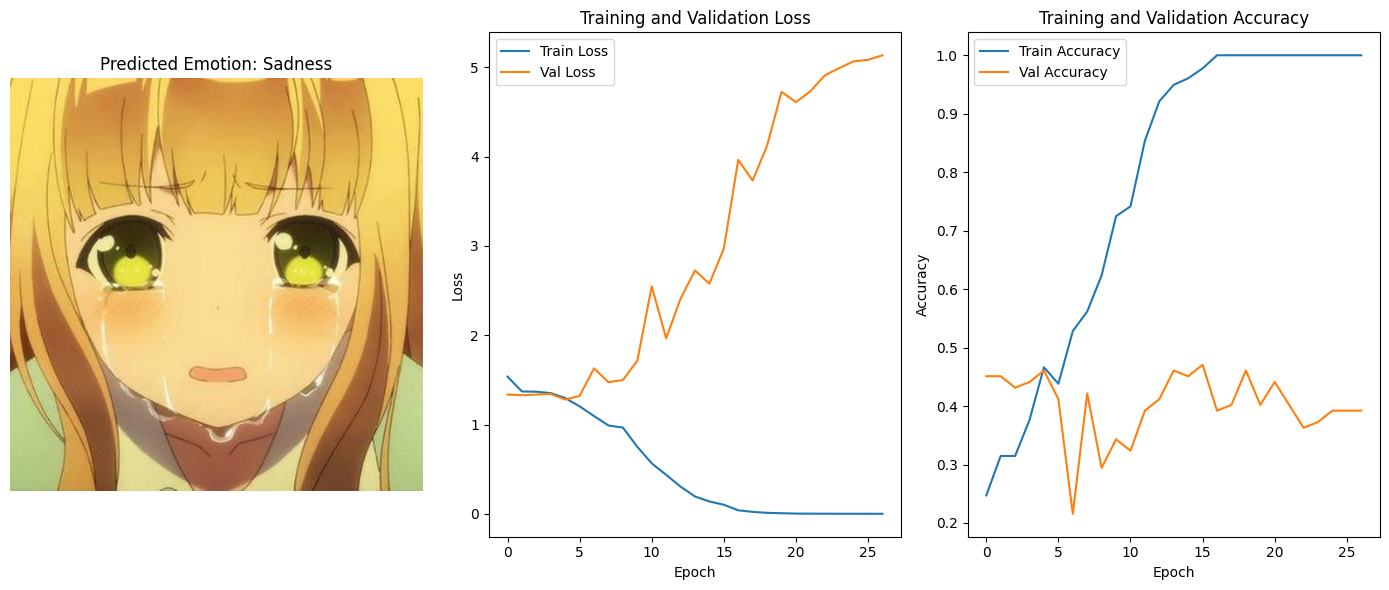

In [72]:
img_path = '/content/drive/My Drive/ML/Test/yellowgirl.png'
#img_path = '/content/drive/My Drive/ML/Test/ganyu.png'
#img_path = '/content/drive/My Drive/ML/Test/nikoangr (Custom).png'
#img_path = '/content/drive/My Drive/ML/Test/oz128.png'
#img_path = '/content/drive/My Drive/ML/Test/ozz2.jpg'
#img_path = '/content/drive/My Drive/ML/Test/sparkle.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])
predicted_emotion = class_names[predicted_class]

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 58ms/step


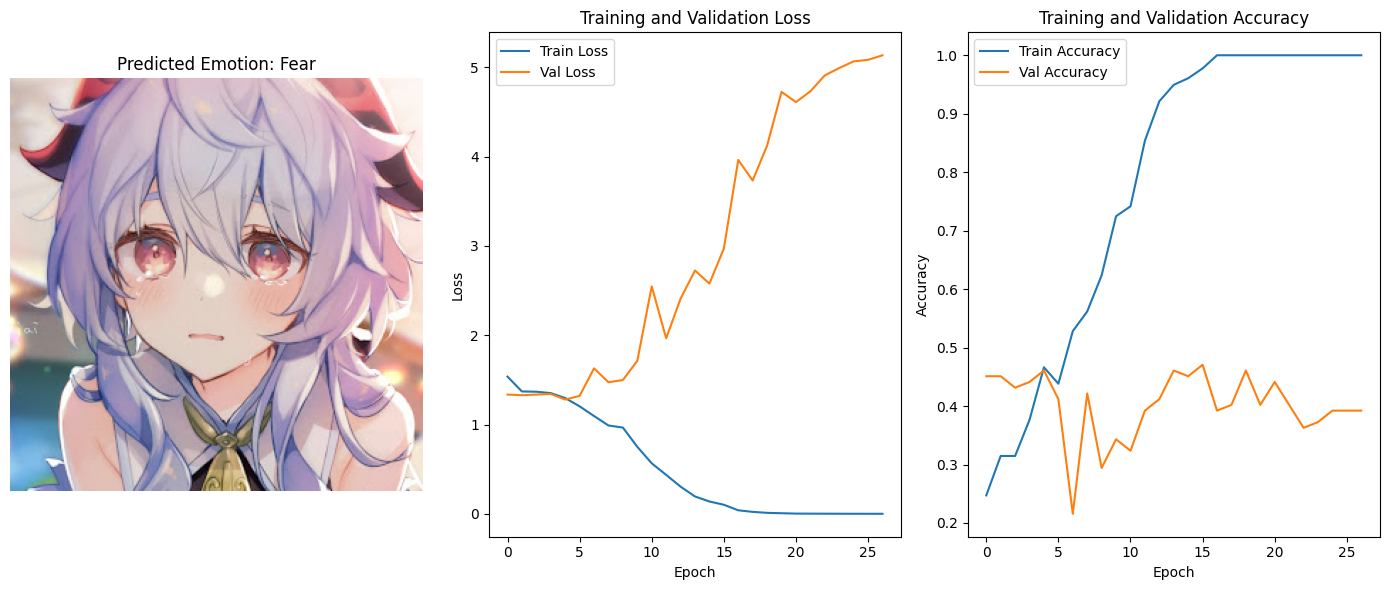

In [73]:
#img_path = '/content/drive/My Drive/ML/Test/yellowgirl.png'
img_path = '/content/drive/My Drive/ML/Test/ganyu.png'
#img_path = '/content/drive/My Drive/ML/Test/nikoangr (Custom).png'
#img_path = '/content/drive/My Drive/ML/Test/oz128.png'
#img_path = '/content/drive/My Drive/ML/Test/ozz2.jpg'
#img_path = '/content/drive/My Drive/ML/Test/sparkle.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])
predicted_emotion = class_names[predicted_class]

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 26ms/step


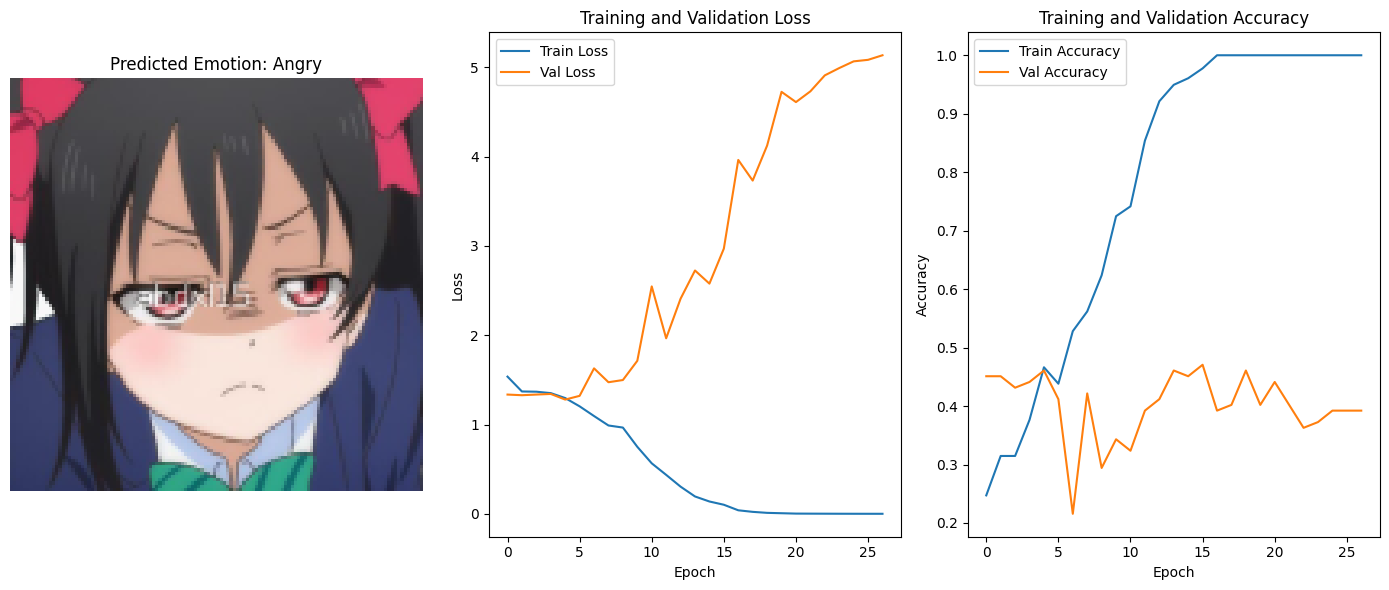

In [74]:
#img_path = '/content/drive/My Drive/ML/Test/yellowgirl.png'
#img_path = '/content/drive/My Drive/ML/Test/ganyu.png'
img_path = '/content/drive/My Drive/ML/Test/nikoangr (Custom).png'
#img_path = '/content/drive/My Drive/ML/Test/oz128.png'
#img_path = '/content/drive/My Drive/ML/Test/ozz2.jpg'
#img_path = '/content/drive/My Drive/ML/Test/sparkle.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])
predicted_emotion = class_names[predicted_class]

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 33ms/step


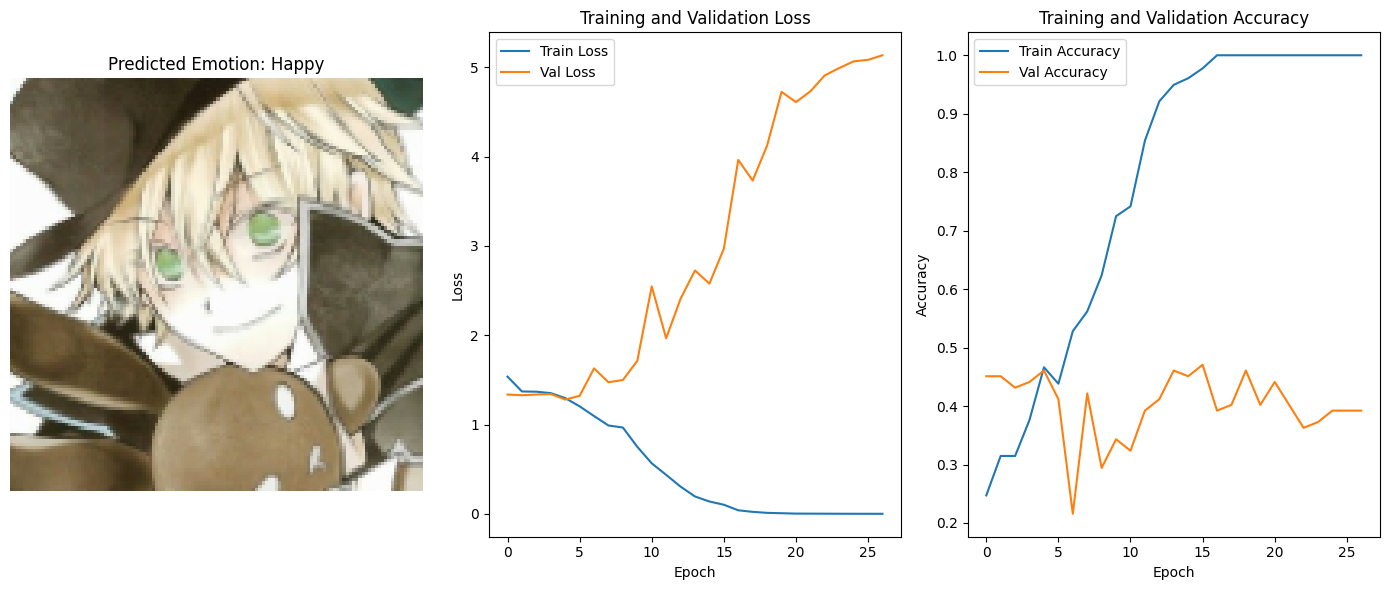

In [75]:
#img_path = '/content/drive/My Drive/ML/Test/yellowgirl.png'
#img_path = '/content/drive/My Drive/ML/Test/ganyu.png'
#img_path = '/content/drive/My Drive/ML/Test/nikoangr (Custom).png'
img_path = '/content/drive/My Drive/ML/Test/oz128.png'
#img_path = '/content/drive/My Drive/ML/Test/ozz2.jpg'
#img_path = '/content/drive/My Drive/ML/Test/sparkle.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])
predicted_emotion = class_names[predicted_class]

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 17ms/step


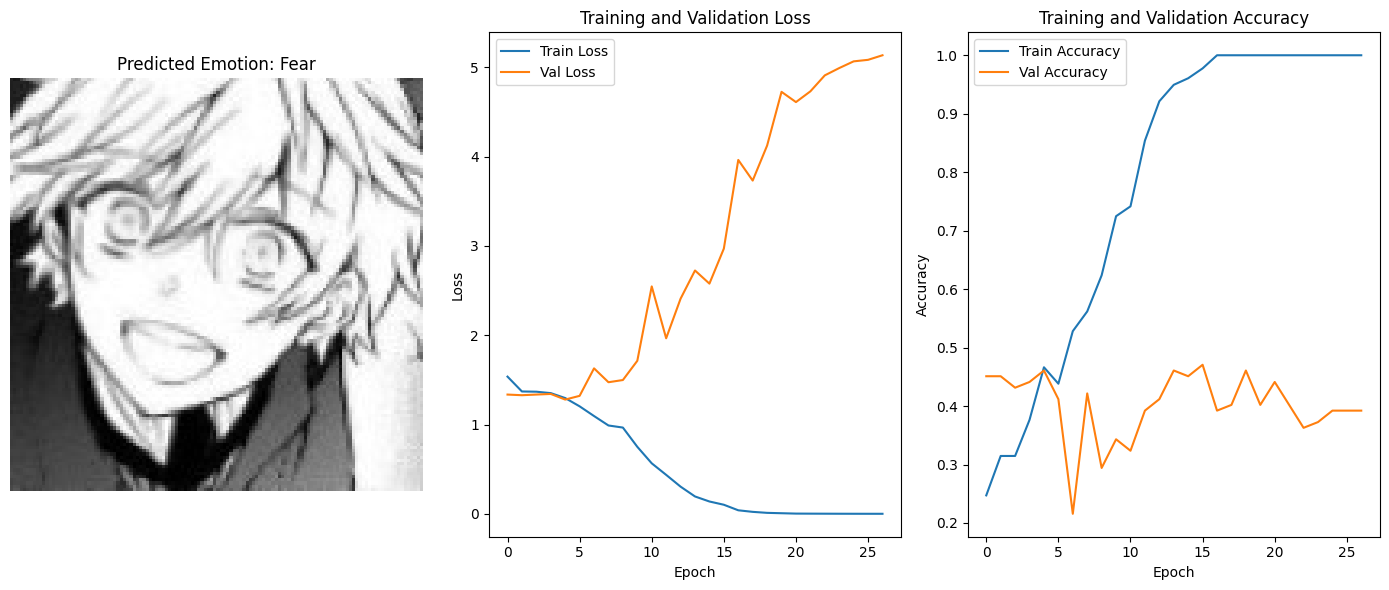

In [76]:
#img_path = '/content/drive/My Drive/ML/Test/yellowgirl.png'
#img_path = '/content/drive/My Drive/ML/Test/ganyu.png'
#img_path = '/content/drive/My Drive/ML/Test/nikoangr (Custom).png'
#img_path = '/content/drive/My Drive/ML/Test/oz128.png'
img_path = '/content/drive/My Drive/ML/Test/ozz2.jpg'
#img_path = '/content/drive/My Drive/ML/Test/sparkle.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])
predicted_emotion = class_names[predicted_class]

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 28ms/step


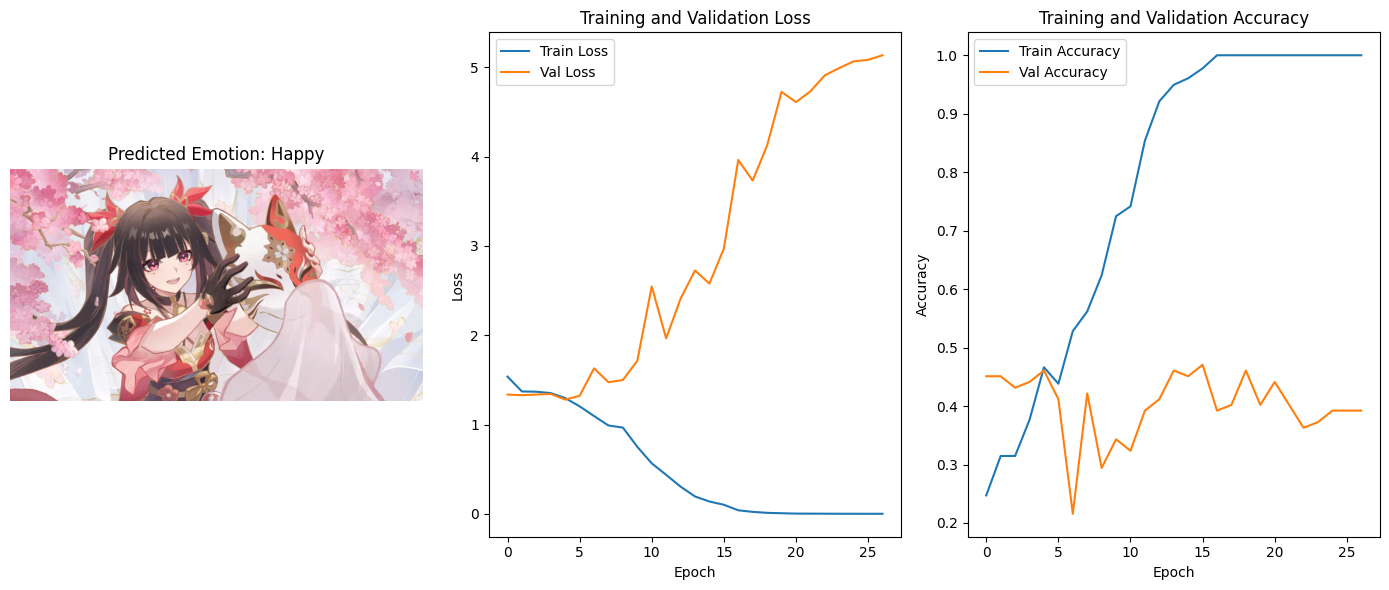

In [77]:
#img_path = '/content/drive/My Drive/ML/Test/yellowgirl.png'
#img_path = '/content/drive/My Drive/ML/Test/ganyu.png'
#img_path = '/content/drive/My Drive/ML/Test/nikoangr (Custom).png'
#img_path = '/content/drive/My Drive/ML/Test/oz128.png'
#img_path = '/content/drive/My Drive/ML/Test/ozz2.jpg'
img_path = '/content/drive/My Drive/ML/Test/sparkle.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])
predicted_emotion = class_names[predicted_class]

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()